In [32]:
#Imorting all libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
import statistics

In [47]:
#read and shuffle data
df = pd.read_csv("/content/Dataset-1b.csv")
df = df.sample(frac = 1)

In [48]:
df.columns

Index(['Patient_ID', 'Patient_age_quantile', 'Regular_Ward', 'Semi-ICU', 'ICU',
       'Hematocrit', 'Hemoglobin', 'Platelets', 'Mean_platelet_volume_',
       'Red_blood_Cells', 'Lymphocytes',
       'Mean_corpuscular_hemoglobin_concentration (MCHC)', 'Leukocytes',
       'Basophils', 'Mean_corpuscular_hemoglobin_(MCH)', 'Eosinophils',
       'Mean_corpuscular_volume_(MCV)', 'Monocytes',
       'Red_blood_cell_distribution_width_(RDW)', 'SARS-Cov-2_exam_result'],
      dtype='object')

In [49]:
df

,Patient_ID,Patient_age_quantile,Regular_Ward,Semi-ICU,ICU,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),SARS-Cov-2_exam_result
492,e1ed5e1095ae65d,7,0,0,0,0.694287,0.854844,-0.178244,-0.662483,0.930631,-0.287196,0.742040,-0.492550,-0.223767,-0.239998,-0.751229,-0.634990,0.620179,-1.067355,1
371,42c39647526622e,9,0,0,0,-0.473031,-0.460932,1.844207,-0.550290,-0.620840,0.625411,-0.054585,0.178103,-0.529226,0.334989,-0.203417,0.386517,-0.456613,-0.536617,0
17,dde616ba4d00c83,10,0,0,0,0.190738,0.040316,-1.057571,0.235063,-0.462168,-1.268037,-0.552476,1.224433,-0.529226,0.962249,-0.793368,1.347937,0.488863,-0.713529,0
136,33a9bddaaeb5992,19,0,0,0,1.884493,1.732028,-0.705840,1.917961,1.406651,-0.184848,-0.054585,-0.361758,0.692611,0.334989,1.861413,0.426576,0.804021,-0.271247,0
196,64f5f4b544e555d,16,0,0,0,-0.335699,-0.147652,1.454791,0.235063,-0.444537,0.889812,0.642463,-0.690128,1.608988,0.544077,-0.371974,0.266340,0.199968,-0.536617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,7d4caafaff67057,6,0,0,0,1.335167,1.544059,-0.002379,-0.101517,1.230347,-0.099557,1.040773,-0.768046,1.303529,0.334989,-0.498393,-0.114222,0.278757,0.259492,0
306,0fff169e0f29b04,19,0,0,0,0.488289,0.729532,0.148363,0.010677,0.542763,-1.319211,1.040773,0.439686,-0.834685,0.230447,-0.835508,-0.254428,-1.979879,0.082579,0
294,72bb50268393c06,3,0,0,0,-1.274131,-0.899524,0.399599,0.683835,-0.991078,0.113669,1.339507,0.648395,0.387152,0.230447,-0.119138,-0.394636,-0.614192,-1.155812,0
520,d0d7a0ee8d7e277,15,0,1,0,-0.427254,-0.022340,-1.107818,-0.550290,-0.250603,0.147785,1.538664,-1.332953,-0.223767,0.387261,-0.287696,-0.334546,0.094915,-1.067355,1


In [50]:
df['SARS-Cov-2_exam_result'].value_counts()

0    519
1     83
Name: SARS-Cov-2_exam_result, dtype: int64

In [51]:
df.shape

(602, 20)

In [52]:
#dropping id column as it is not a valid attribute to train model
#df = df.drop(['Unnamed: 0'], axis = 1)
df = df.drop(['Patient_ID'], axis = 1)

In [53]:
df

,Patient_age_quantile,Regular_Ward,Semi-ICU,ICU,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),SARS-Cov-2_exam_result
492,7,0,0,0,0.694287,0.854844,-0.178244,-0.662483,0.930631,-0.287196,0.742040,-0.492550,-0.223767,-0.239998,-0.751229,-0.634990,0.620179,-1.067355,1
371,9,0,0,0,-0.473031,-0.460932,1.844207,-0.550290,-0.620840,0.625411,-0.054585,0.178103,-0.529226,0.334989,-0.203417,0.386517,-0.456613,-0.536617,0
17,10,0,0,0,0.190738,0.040316,-1.057571,0.235063,-0.462168,-1.268037,-0.552476,1.224433,-0.529226,0.962249,-0.793368,1.347937,0.488863,-0.713529,0
136,19,0,0,0,1.884493,1.732028,-0.705840,1.917961,1.406651,-0.184848,-0.054585,-0.361758,0.692611,0.334989,1.861413,0.426576,0.804021,-0.271247,0
196,16,0,0,0,-0.335699,-0.147652,1.454791,0.235063,-0.444537,0.889812,0.642463,-0.690128,1.608988,0.544077,-0.371974,0.266340,0.199968,-0.536617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,6,0,0,0,1.335167,1.544059,-0.002379,-0.101517,1.230347,-0.099557,1.040773,-0.768046,1.303529,0.334989,-0.498393,-0.114222,0.278757,0.259492,0
306,19,0,0,0,0.488289,0.729532,0.148363,0.010677,0.542763,-1.319211,1.040773,0.439686,-0.834685,0.230447,-0.835508,-0.254428,-1.979879,0.082579,0
294,3,0,0,0,-1.274131,-0.899524,0.399599,0.683835,-0.991078,0.113669,1.339507,0.648395,0.387152,0.230447,-0.119138,-0.394636,-0.614192,-1.155812,0
520,15,0,1,0,-0.427254,-0.022340,-1.107818,-0.550290,-0.250603,0.147785,1.538664,-1.332953,-0.223767,0.387261,-0.287696,-0.334546,0.094915,-1.067355,1


In [54]:
df.isnull().any()

Patient_age_quantile                                False
Regular_Ward                                        False
Semi-ICU                                            False
ICU                                                 False
Hematocrit                                          False
Hemoglobin                                          False
Platelets                                           False
Mean_platelet_volume_                                True
Red_blood_Cells                                     False
Lymphocytes                                         False
Mean_corpuscular_hemoglobin_concentration (MCHC)    False
Leukocytes                                          False
Basophils                                           False
Mean_corpuscular_hemoglobin_(MCH)                   False
Eosinophils                                         False
Mean_corpuscular_volume_(MCV)                       False
Monocytes                                            True
Red_blood_cell

In [ ]:
#df = df.fillna(lambda x: x.median())

In [55]:
data = df.to_numpy()

data.shape

(602, 19)

In [56]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(data)
#X_2 = X
SimpleImputer()
data = imp.transform(data)

data

array([[ 7.        ,  0.        ,  0.        , ...,  0.62017876,
        -1.06735504,  1.        ],
       [ 9.        ,  0.        ,  0.        , ..., -0.45661277,
        -0.53661668,  0.        ],
       [10.        ,  0.        ,  0.        , ...,  0.48886269,
        -0.71352947,  0.        ],
       ...,
       [ 3.        ,  0.        ,  0.        , ..., -0.61419201,
        -1.15581191,  0.        ],
       [15.        ,  0.        ,  1.        , ...,  0.09491457,
        -1.06735504,  1.        ],
       [12.        ,  0.        ,  0.        , ...,  0.46259964,
        -0.09433432,  0.        ]])

In [57]:
#splitting into 7 folds
data_g = np.array_split(data, 7)

## **LOGISTIC REGRESSION**

0.8961038961038961
----------------------TESTING-----------------------
                precision    recall  f1-score   support

Covid Negative       0.94      0.97      0.96        77
Covid Positive       0.67      0.44      0.53         9

      accuracy                           0.92        86
     macro avg       0.80      0.71      0.74        86
  weighted avg       0.91      0.92      0.91        86

------------------TRAINING-----------------
                precision    recall  f1-score   support

Covid Negative       0.93      0.99      0.96       442
Covid Positive       0.89      0.53      0.66        74

      accuracy                           0.92       516
     macro avg       0.91      0.76      0.81       516
  weighted avg       0.92      0.92      0.91       516



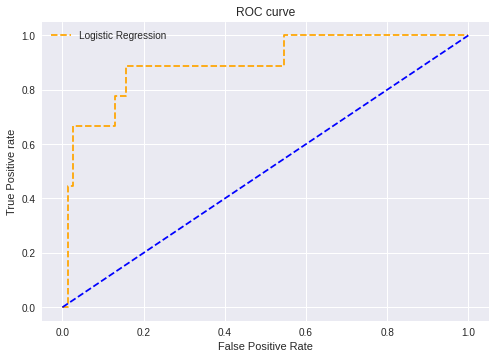

In [58]:
accuracy_log_test = []
accuracy_log_train = []
classif_log_test=[]
classif_log_train=[]

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:18])
                train_data_y.append(data_g[j][w][18])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:18])
                test_data_y.append(data_g[j][w][18])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn 
    clf = LogisticRegression(random_state = 0)
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr1, tpr1, thresh1 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    #calculating and appending accuracies
    acc1_log = accuracy_score(test_data_yn, test_pred_y_log)
    accuracy_log_test.append(acc1_log)
    print("----------------------TESTING-----------------------")
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(test_data_yn, test_pred_y_log, target_names=target_names))
    print("------------------TRAINING-----------------")
    acc2_log = accuracy_score(train_data_yn, train_pred_y_log)
    accuracy_log_train.append(acc2_log)
    target_names = ['Covid Negative', 'Covid Positive']
    print(classification_report(train_data_yn, train_pred_y_log, target_names=target_names))


In [59]:
#Creating the Confusion matrix
cm= confusion_matrix(test_data_yn, test_pred_y_log)
cm

array([[75,  2],
       [ 5,  4]])

In [60]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_log_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_log_train))


Mean accuracy for test set =  0.9186046511627907
Mean accuracy for train set =  0.9224806201550387


# **NAIVE BAYES**

0.7835497835497836


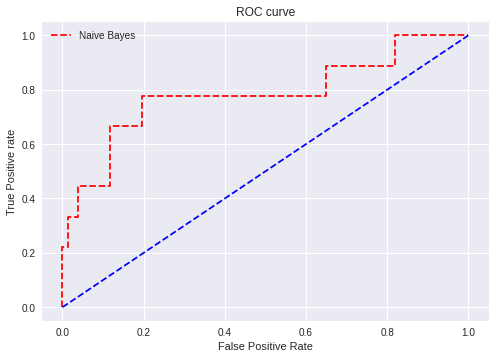

In [61]:
accuracy_nb_test = []
accuracy_nb_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:18])
                train_data_y.append(data_g[j][w][18])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:18])
                test_data_y.append(data_g[j][w][18])
       
    #convert into array         
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = GaussianNB()
    clf.fit(train_data_xn, train_data_yn)

    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr2, tpr2, thresh2 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_nb = clf.predict(test_data_xn)
    train_pred_y_nb = clf.predict(train_data_xn)

    #calculating and appending accuracies
    acc1_nb = accuracy_score(test_data_yn, test_pred_y_nb)
    accuracy_nb_test.append(acc1_nb)
    
    acc2_nb = accuracy_score(train_data_yn, train_pred_y_nb)
    accuracy_nb_train.append(acc2_nb)

In [62]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_nb_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_nb_train))

Mean accuracy for test set =  0.8604651162790697
Mean accuracy for train set =  0.874031007751938


# ***Fisher Linear Discriminant***

0.8571428571428571


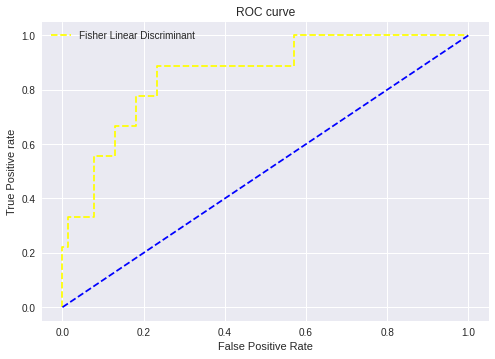

In [63]:
accuracy_fl_test = []
accuracy_fl_train = []

for i in range(7):
  if i == 6:
    test_data = data_g[i]
    test_data_x = []
    test_data_y = []
    train_data_x = []
    train_data_y = []
    for j in range(7):
        if j!=i:      #creating training dataset
            for w in range(len(data_g[j])):
                train_data_x.append(data_g[j][w][:18])
                train_data_y.append(data_g[j][w][18])
        elif j == i:      #creating testing dataset
            for w in range(len(data_g[j])):
                test_data_x.append(data_g[j][w][:18])
                test_data_y.append(data_g[j][w][18])
                
    #convert into array
    test_data_xn = np.array(test_data_x)
    train_data_xn = np.array(train_data_x)
    test_data_yn = np.array(test_data_y)
    train_data_yn = np.array(train_data_y)
    
    #importing model from sklearn
    clf = LinearDiscriminantAnalysis()
    clf.fit(train_data_xn, train_data_yn)
    
    #predict class
    test_pred_y_log = clf.predict(test_data_xn)
    train_pred_y_log = clf.predict(train_data_xn)
    
    pred_prob1 = clf.predict_proba(test_data_xn)

    from sklearn.metrics import roc_curve

    # roc curve for models
    fpr3, tpr3, thresh3 = roc_curve(test_data_yn, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
    random_probs = [0 for i in range(len(test_data_yn))]
    p_fpr, p_tpr, _ = roc_curve(test_data_yn, random_probs, pos_label=1)
    
    from sklearn.metrics import roc_auc_score
    auc_score1 = roc_auc_score(test_data_yn, pred_prob1[:,1])
    print(auc_score1)

    # matplotlib
    import matplotlib.pyplot as plt
    plt.style.use('seaborn')

    # plot roc curves
    plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Fisher Linear Discriminant')
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
    plt.title('ROC curve')
    # x label
    plt.xlabel('False Positive Rate')
    # y label
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.savefig('ROC',dpi=300)
    #predict class
    test_pred_y_fl = clf.predict(test_data_xn)
    train_pred_y_fl = clf.predict(train_data_xn)
    
    #calculating and appending accuracies
    acc1_fl = accuracy_score(test_data_yn, test_pred_y_fl)
    accuracy_fl_test.append(acc1_fl)
    
    acc2_fl = accuracy_score(train_data_yn, train_pred_y_fl)
    accuracy_fl_train.append(acc2_fl)

In [64]:
#printing accuracies 

print("Mean accuracy for test set = ", statistics.mean(accuracy_fl_test))
print("Mean accuracy for train set = ", statistics.mean(accuracy_fl_train))

Mean accuracy for test set =  0.8837209302325582
Mean accuracy for train set =  0.8934108527131783


# **KNN**

In [65]:
df

,Patient_age_quantile,Regular_Ward,Semi-ICU,ICU,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW),SARS-Cov-2_exam_result
492,7,0,0,0,0.694287,0.854844,-0.178244,-0.662483,0.930631,-0.287196,0.742040,-0.492550,-0.223767,-0.239998,-0.751229,-0.634990,0.620179,-1.067355,1
371,9,0,0,0,-0.473031,-0.460932,1.844207,-0.550290,-0.620840,0.625411,-0.054585,0.178103,-0.529226,0.334989,-0.203417,0.386517,-0.456613,-0.536617,0
17,10,0,0,0,0.190738,0.040316,-1.057571,0.235063,-0.462168,-1.268037,-0.552476,1.224433,-0.529226,0.962249,-0.793368,1.347937,0.488863,-0.713529,0
136,19,0,0,0,1.884493,1.732028,-0.705840,1.917961,1.406651,-0.184848,-0.054585,-0.361758,0.692611,0.334989,1.861413,0.426576,0.804021,-0.271247,0
196,16,0,0,0,-0.335699,-0.147652,1.454791,0.235063,-0.444537,0.889812,0.642463,-0.690128,1.608988,0.544077,-0.371974,0.266340,0.199968,-0.536617,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,6,0,0,0,1.335167,1.544059,-0.002379,-0.101517,1.230347,-0.099557,1.040773,-0.768046,1.303529,0.334989,-0.498393,-0.114222,0.278757,0.259492,0
306,19,0,0,0,0.488289,0.729532,0.148363,0.010677,0.542763,-1.319211,1.040773,0.439686,-0.834685,0.230447,-0.835508,-0.254428,-1.979879,0.082579,0
294,3,0,0,0,-1.274131,-0.899524,0.399599,0.683835,-0.991078,0.113669,1.339507,0.648395,0.387152,0.230447,-0.119138,-0.394636,-0.614192,-1.155812,0
520,15,0,1,0,-0.427254,-0.022340,-1.107818,-0.550290,-0.250603,0.147785,1.538664,-1.332953,-0.223767,0.387261,-0.287696,-0.334546,0.094915,-1.067355,1


In [66]:
y=df[['SARS-Cov-2_exam_result']] 
y

,SARS-Cov-2_exam_result
492,1
371,0
17,0
136,0
196,0
...,...
354,0
306,0
294,0
520,1


In [67]:
x=df.drop(['SARS-Cov-2_exam_result'], axis = 1)
x

,Patient_age_quantile,Regular_Ward,Semi-ICU,ICU,Hematocrit,Hemoglobin,Platelets,Mean_platelet_volume_,Red_blood_Cells,Lymphocytes,Mean_corpuscular_hemoglobin_concentration (MCHC),Leukocytes,Basophils,Mean_corpuscular_hemoglobin_(MCH),Eosinophils,Mean_corpuscular_volume_(MCV),Monocytes,Red_blood_cell_distribution_width_(RDW)
492,7,0,0,0,0.694287,0.854844,-0.178244,-0.662483,0.930631,-0.287196,0.742040,-0.492550,-0.223767,-0.239998,-0.751229,-0.634990,0.620179,-1.067355
371,9,0,0,0,-0.473031,-0.460932,1.844207,-0.550290,-0.620840,0.625411,-0.054585,0.178103,-0.529226,0.334989,-0.203417,0.386517,-0.456613,-0.536617
17,10,0,0,0,0.190738,0.040316,-1.057571,0.235063,-0.462168,-1.268037,-0.552476,1.224433,-0.529226,0.962249,-0.793368,1.347937,0.488863,-0.713529
136,19,0,0,0,1.884493,1.732028,-0.705840,1.917961,1.406651,-0.184848,-0.054585,-0.361758,0.692611,0.334989,1.861413,0.426576,0.804021,-0.271247
196,16,0,0,0,-0.335699,-0.147652,1.454791,0.235063,-0.444537,0.889812,0.642463,-0.690128,1.608988,0.544077,-0.371974,0.266340,0.199968,-0.536617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,6,0,0,0,1.335167,1.544059,-0.002379,-0.101517,1.230347,-0.099557,1.040773,-0.768046,1.303529,0.334989,-0.498393,-0.114222,0.278757,0.259492
306,19,0,0,0,0.488289,0.729532,0.148363,0.010677,0.542763,-1.319211,1.040773,0.439686,-0.834685,0.230447,-0.835508,-0.254428,-1.979879,0.082579
294,3,0,0,0,-1.274131,-0.899524,0.399599,0.683835,-0.991078,0.113669,1.339507,0.648395,0.387152,0.230447,-0.119138,-0.394636,-0.614192,-1.155812
520,15,0,1,0,-0.427254,-0.022340,-1.107818,-0.550290,-0.250603,0.147785,1.538664,-1.332953,-0.223767,0.387261,-0.287696,-0.334546,0.094915,-1.067355


In [68]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(x)
#X_2 = X
SimpleImputer()
X = imp.transform(x)
X

array([[ 7.        ,  0.        ,  0.        , ..., -0.63498986,
         0.62017876, -1.06735504],
       [ 9.        ,  0.        ,  0.        , ...,  0.3865172 ,
        -0.45661277, -0.53661668],
       [10.        ,  0.        ,  0.        , ...,  1.34793651,
         0.48886269, -0.71352947],
       ...,
       [ 3.        ,  0.        ,  0.        , ..., -0.39463577,
        -0.61419201, -1.15581191],
       [15.        ,  0.        ,  1.        , ..., -0.33454648,
         0.09491457, -1.06735504],
       [12.        ,  0.        ,  0.        , ...,  0.54675424,
         0.46259964, -0.09433432]])

In [69]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.1, random_state=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.7088235294117647


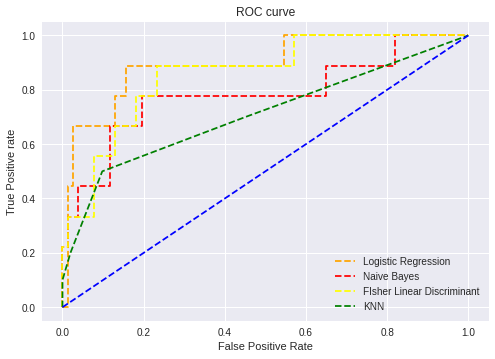

In [70]:
#Fitting K-NN classifier to the training set
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)
#importing model from sklearn 
    
    #predict class
test_pred_y_log = classifier.predict(x_test)
train_pred_y_log = classifier.predict(x_train)
    
pred_prob1 = classifier.predict_proba(x_test)

from sklearn.metrics import roc_curve

    # roc curve for models
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

    # roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
    
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
print(auc_score1)

    # matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

    # plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Naive Bayes')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='FIsher Linear Discriminant')
plt.plot(fpr4, tpr4, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    # title
plt.title('ROC curve')
    # x label
plt.xlabel('False Positive Rate')
    # y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [71]:
#Predicting the test set result  
y_pred= classifier.predict(x_test) 
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [72]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)

In [73]:
#finding accuracy
accuracy = accuracy_score(y_test, y_pred)

In [74]:
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("The Confusion Matrix is:\n ",cm)
target_names = ['Covid Negative', 'Covid Positive']
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 85.25%
The Confusion Matrix is:
  [[50  1]
 [ 8  2]]
                precision    recall  f1-score   support

Covid Negative       0.86      0.98      0.92        51
Covid Positive       0.67      0.20      0.31        10

      accuracy                           0.85        61
     macro avg       0.76      0.59      0.61        61
  weighted avg       0.83      0.85      0.82        61

